In [1]:
# Imports
import math
from IPython.display import display, Math, Latex

from scipy.stats import norm, f, t
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def mean(data):
    return sum(data) / len(data)

def sample_variance(data):
    sigma = mean(data)
    
    sum_diffs = 0
    for element in data:
        sum_diffs += (element - sigma)**2
    variance = (1 / (len(data) - 1)) * sum_diffs
    return variance

def sample_deviation(data):
    variance = sample_variance(data)
    return math.sqrt(variance)

def population_variance(data):
    sigma = mean(data)
    
    sum_diffs = 0
    for element in data:
        sum_diffs += (element - sigma)**2
    variance = (1 / (len(data))) * sum_diffs
    return variance

def population_deviation(data):
    variance = population_variance(data)
    return math.sqrt(variance)

### Binomial Distribution

##### Binomial Probability Distribution
    
$P(x) = \frac{n!}{x!(n - x)!}p^x(1 - p)^{n-x}$

In [3]:
def binom_prob_distribution(x, n, p):
    """
    The probability of x successes in a binomial experiment 
    with n trials and a probabilty of success of p
    
    Args:
        x : Number of successes to calculate probability for 
        n : Number of trials to conduct
        p : Probabilty of a successful result
    """
    display(Math(f'x = {x}'))
    display(Math(f'n = {n}'))
    display(Math(f'p = {p}'))
    display(Math(r'P(x) = \frac{n!}{x!(n - x)!}p^x(1 - p)^{n-x}'))
    display(Math(
        f'P(x) = \\frac{{ {n}! }}{{ {x}!({n} - {x})!}} {p}^{x}(1 - {p})^{{{n}-{x}}}'
    ))
    # calculate factorials
    f_n = math.factorial(n)
    f_x = math.factorial(x)
    f_nx = math.factorial(n - x)
    
    # Calculate probabilty elements
    p_by_trials = p**x
    p_failure = 1 - p
    no_failure = n - x
    display(Math(
        f'P(x) = \\frac{{ {f_n:g} }}{{ {f_x:g} \\cdot {f_nx:g} }}{p_by_trials:g}({p_failure:g})^{no_failure:g}'
    ))
    
    coefficient = f_n / (f_x * f_nx)
    probabilty = p_by_trials * (p_failure**no_failure)
    display(Math(f'P(x) = {coefficient:g} \\cdot {probabilty:g}'))
    result = coefficient * probabilty
    display(Math(f'P(x) = {result:g}'))
    return result
    

In [4]:
result = binom_prob_distribution(2, 10, .2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Binomial Mean Variance and Standard Deviation

##### mean
$ \mu = np $
##### Variance
$ \sigma^2 = np(1 - p) $
##### Standard Deviation
$ \sigma = \sqrt{np(1 - p)} $

In [5]:
def binom_mean(n, p):
    """
    Binomial Mean
    
    Args:
        n : Number of trials
        p : probabilty of a success
    """
    display(Math(r'\mu = np'))
    display(Math(f'\\mu = {n} \\cdot {p}'))
    result = n * p
    display(Math(f'\\mu = {result}'))
    return result

def binom_std_deviation(n, p):
    """
    Binomial Mean
    
    Args:
        n : Number of trials
        p : probabilty of a success
    """
    display(Math(r'\sigma = \sqrt{np(1 - p)}'))
    display(Math(f'\\sigma = \sqrt{{{n} \\cdot {p} \\cdot (1 - {p})  }}'))
    variance = n * p * (1 - p)
    display(Math(f'\\sigma = \sqrt{{{variance:g}}}'))
    result = math.sqrt(variance)
    display(Math(f'\\sigma = {result:g}'))
    return result

In [6]:
result = binom_mean(10, .2)
result = binom_std_deviation(10, .2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
result = binom_prob_distribution(1, 10, 0.98)
print(f'{result}')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

5.01760000000004e-15


### Normal Distribution

#### Normal Density Function
$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $

In [8]:
def normal_density_function(x, mean, std_dev):
    """
    Binomial Mean
    
    Args:
        x : 
        mean : Average value - Centre of a normal distribution
        std_dev : Distribution of data - Widens or narrows curve
    """
    display(Math(r'f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}'))
    display(Math(f'f(x) = \\frac{{1}}{{ {std_dev} \\sqrt{{2 \\times {math.pi:5f} }}}}{math.e:.5f}^{{-\\frac{{1}}{{2}}(\\frac{{{x}-{mean}}}{{{std_dev}}})^2}}'))
    pi_squared = 2 * math.pi
    coeff = (1/2 * ((x - mean) / std_dev)**2)
    display(Math(f'f(x) = \\frac{{1}}{{ {std_dev} \\sqrt{{ {pi_squared:5f} }}}}{math.e:.5f}^{{- {coeff} }}'))
    e_coeff = math.e**-coeff
    
    std_dev_by_pi_sqr = std_dev *(math.sqrt(pi_squared))
    display(Math(f'f(x) = \\frac{{1}}{{ {std_dev_by_pi_sqr:g} }}{e_coeff:g}'))
    result = (1/ std_dev_by_pi_sqr) * e_coeff
    display(Math(f'f(x) = {result:g}'))
    return result

def normal_density_function_range(X, mean, std_dev):
    """
    Binomial Mean
    
    Args:
        x : 
        mean : Average value - Centre of a normal distribution
        std_dev : Distribution of data - Widens or narrows curve
    """
    results = []
    for x in X:
        pi_squared = 2 * math.pi
        coeff = (1/2 * ((x - mean) / std_dev)**2)
        e_coeff = math.e**-coeff
        std_dev_by_pi_sqr = std_dev *(math.sqrt(pi_squared))
        results.append((1/ std_dev_by_pi_sqr) * e_coeff)
    return results


z-score for 0.95 confidence 1.960
% for z-score 0.975


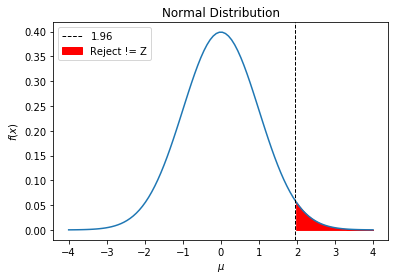

p-value 0.024997895148220373
(83.29448560287199, 94.30551439712801)
-0.42720018726587755
Is -1.960 < -0.42720018726587755 < 1.960


0.9930531492113757

In [9]:
def confidence(percent):
    # Convert a confidence percentage to a z-score
    assert 0 <= percent <= 1
    value = 1-(1-percent)/2
    z = norm.ppf(value)
    return z

def confidence_interval(percent, mean, variance, sample_size):
    lower = mean - (confidence(percent) * (variance / math.sqrt(sample_size)))
    upper = mean + (confidence(percent) * (variance / math.sqrt(sample_size)))
    return lower, upper

def cdf(x, mean=0, std_dev=1):
    z = (x - mean) / std_dev
    return (1.0 + math.erf(z / math.sqrt(2.0))) / 2.0

def cdf2(x, mean, std_dev):
    z = (x - mean) / std_dev
    return (1.0 + math.erf(z / math.sqrt(2.0))) / 2.0

def area_under_curve(a, b, mean, std_dev):
    assert b > a
    z_a = (a - mean) / std_dev
    z_b = (b - mean) / std_dev
    area_a = (1.0 + math.erf(z_a / math.sqrt(2.0))) / 2.0
    area_b = (1.0 + math.erf(z_b / math.sqrt(2.0))) / 2.0
    return area_b - area_a

def standardised_z_score(x, mu, sigma, n):
    z = (x - mu) / (sigma / math.sqrt(n))
    return z

def p_value(z, mean, std_dev, z_type='lt'):
    if z_type == 'lt':
        p = cdf(z, mean, std_dev)
    elif z_type =='gt':
        p = 1 - cdf(z, mean, std_dev)
    elif z_type == 'neq':
        cdf(z, mean, std_dev) + 1 - cdf(z, mean, std_dev)
        
    return p

def plot_normal_distribution(mu, sigma, Z=None, z_type='lt', intervals=100):
    assert z_type in ['neq', 'lt', 'gt']
    
    x = np.linspace(mu - sigma * 4, mu + sigma * 4,intervals)
    plt.title('Normal Distribution')
    plt.xlabel('$µ$')
    plt.ylabel('$f(x)$')
    plt.plot(x, normal_density_function_range(x, mu, sigma))
    
    if Z and z_type in ['lt', 'neq']:
        start = None
        end = Z
        if start == None:
            fill_x = [v for v in x if v < end]
        else:
            fill_x = [v for v in x if start < v < end]
        plt.axvline(Z, label=Z, color='k', linestyle='dashed', linewidth=1)
        plt.fill_between(fill_x, [0]*len(fill_x), normal_density_function_range(fill_x, mu, sigma), color='red')
    if Z and z_type in ['gt', 'neq']:
        end = Z
        fill_x = [v for v in x if v > end * -1]
        plt.axvline(Z * -1, label=Z * -1, color='k', linestyle='dashed', linewidth=1)
        plt.fill_between(fill_x, [0]*len(fill_x), normal_density_function_range(fill_x, mu, sigma), color='red', label='Reject != Z')
    plt.legend(loc=0)
    plt.show()


mu = 0
sigma = 1
Z = -1.96

conf = 0.95
print(f'z-score for {conf} confidence {confidence(conf):.3f}')

print('% for z-score', cdf(confidence(conf)))

plot_normal_distribution(mu, sigma, Z, z_type='gt')

print('p-value', p_value(1.96, 0, 1, 'gt'))

print(confidence_interval(.95, 88.8, 24, 73))

# H0 = 90
# H1 != 90
rejection_region = confidence(.95)
hypothesis_zero = 90
sample_mean = 88.8
variance = 24
sample_size = 73
conf = 0.95
test_z = standardised_z_score(88.8, 90, 24, 73)
print(test_z)

# Test hypothesis
print(f'Is -{rejection_region:.3f} < {test_z} < {rejection_region:.3f}')

norm.cdf(2.46)

In [10]:
x_bar = 88.8  # Sample mean
n = 73        # sample size
sigma = 24    # Standard deviation
h = 90        # hypothesis mean
a = 0.05      # significance level
conf = 1 - a  # confidence level

### Hypothesis Test
# 1) Establish hypothesis
print('Set up hypotheses')
display(Math(f'H_0 : \\mu = {h}'))
display(Math(f'H_1 : \\mu \\neq {h}'))

# 2) Calculate test statistic
print('Calculate test statistic')
test_z = standardised_z_score(x_bar, h, sigma, n)
display(Math(f'Z = \\frac{{\\bar{{X}} - \\mu_0}}{{\\frac{{\\sigma}}{{\\sqrt{{n}}}}}} = '
             f' \\frac{{ {x_bar} - {h} }}{{\\frac{{ {sigma} }}{{\\sqrt{{ {n} }}}}}} = {test_z:g}'))

#
print('Calculate rejection regions')
rejection_region_lower = -1 * confidence(conf)
rejection_region_upper = confidence(conf)

display(Math(f'{rejection_region_lower:.3f} < {test_z:g} < {rejection_region_upper:.3f}'))
print('Hypothesis test', rejection_region_lower < test_z < rejection_region_upper)
print('H0 is not rejected')


Set up hypotheses


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculate test statistic


<IPython.core.display.Math object>

Calculate rejection regions


<IPython.core.display.Math object>

Hypothesis test True
H0 is not rejected


In [11]:
result = normal_density_function(62, 50, 5)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
print(norm.cdf(-21, 0, 1), norm.cdf(1100, 1000, 100))

3.2792780189789425e-98 0.8413447460685429


In [13]:


def phi(x):
    #'Cumulative distribution function for the standard normal distribution'
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0
#print(norm.cdf(1, 0, 1))
print(cdf(1.96, 0, 1))
#print(cdf(140, 150, (13.7/math.sqrt(10))))
#print(area_under_curve(-0.71, 0.92, 0, 1))


0.9750021048517796


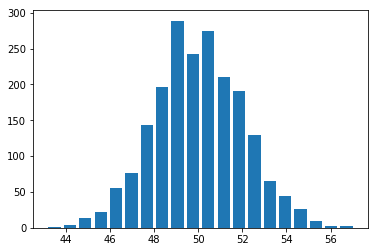

sample mean 50.00828561434889
sample variance 4.094666339122204
sample std dev 2.023528190839506


In [14]:
import random

n = 200  # Sample observation size
m = 2000 # Samples
data = [
    [random.randrange(0, 100) + random.random() for x in range(n)] 
    for x in range(m)
]

sigmas = [mean(d) for d in data]

variances = [sample_variance(d) for d in data]

plt.hist(sigmas, 20, rwidth=0.8)
plt.show()
print('sample mean', mean(sigmas))
print('sample variance', sample_variance(sigmas))
print('sample std dev', sample_deviation(sigmas))

Checking if sample variances are equal


/home/campbell/.local/share/virtualenvs/STAT7055_-_Introduction_to_Statistics-Db-TzhsD/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


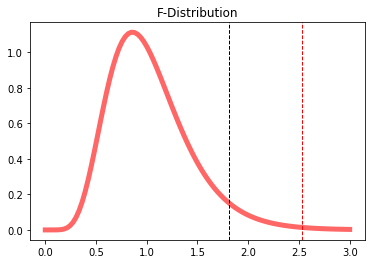

In [15]:
import numpy as np

print('Checking if sample variances are equal')

dfn, dfd = 18, 57
x = np.linspace(0,3,100)
plt.title('F-Distribution')
#plt.plot(x, f.pdf(x, dfn, dfd), 'r-', lw=5, alpha=0.6, label='f pdf')
plt.plot(x, f(dfn, dfd).pdf(x), 'r-', lw=5, alpha=0.6, label='f pdf')
plt.axvline(1.8155, label=1.8155, color='k', linestyle='dashed', linewidth=1)
plt.axvline(2.53, label=2.53, color='r', linestyle='dashed', linewidth=1)
plt.show()

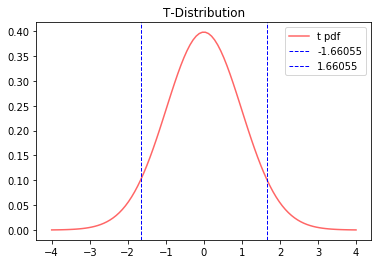

T-value 1.98157
Probabilty 0.975


In [16]:
## Setup      
dof = 98        # Degrees of freedom
alpha = 0.05    # Significence level
ntails = 1      # Number of tails 

## Calculate critical t-score
tcrit = abs(t.ppf(alpha/ntails, dof))

x = np.linspace(-4,4,100)
plt.title('T-Distribution')
plt.plot(x, t.pdf(x, dof), 'r-', alpha=0.6, label='t pdf')
plt.axvline(-tcrit, label=f'{-tcrit:g}', color='b', linestyle='dashed', linewidth=1)
plt.axvline(tcrit, label=f'{tcrit:g}', color='b', linestyle='dashed', linewidth=1)
plt.legend(loc=0)
plt.show()

# define probability
p = 0.975
df = 111
# retrieve value <= probability
value = t.ppf(p, df)
print(f'T-value {value:g}')
# confirm with cdf
p = t.cdf(value, df)
print(f'Probabilty {p:g}')

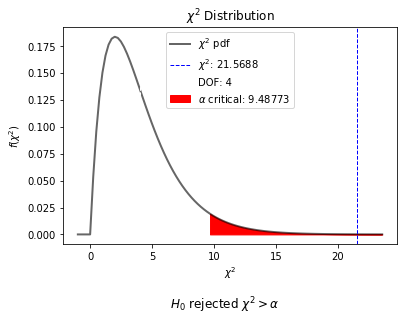

In [17]:
# Example of a Chi-Squared distribution and critical region

from scipy.stats import chi2

def expected_counts(data):
    total = np.sum(data)
    cols = np.sum(data, axis=(0))
    rows = np.sum(data, axis=(1))

    expected_values = []
    
    for row in rows:
        for col in cols:
            expected_values.append(col * row / total)
    return list(zip(list(data.flat), expected_values))

def calc_chi_squared_statistic(data):
    total = 0
    for sample, expected in data:
        total += ((sample - expected)**2) / expected
    
    chi_squared = total
    return chi_squared
    

base_data = np.array(
    [
        [6, 33, 9, 15, 33],
        [14, 32, 26, 9, 29]
    ]
)

base_data = np.array(
    [
         [37, 11, 35],
         [18, 25, 10],
         [20, 24, 20]
    ]
)

data = expected_counts(base_data)

chi_squared_statistic = calc_chi_squared_statistic(data)
c = base_data.shape[0] # no of columns
r = base_data.shape[1] # no of rows
dof = (r - 1) * (c - 1)
alpha = 0.05
# Calculate critical region from alpha (confidence level)
crit = chi2.isf(alpha, df=dof)

x = np.linspace(-1, max(chi_squared_statistic, crit) + 2, 100)
plt.title(r'$\chi^2$ Distribution')
plt.xlabel(r'$\chi^2$')
plt.ylabel(r'$f(\chi^2)$')

plt.plot(x, chi2.pdf(x, dof), 'k', lw=2, alpha=0.6, label='$\chi^2$ pdf')

plt.axvline(
    chi_squared_statistic, label=f'$\\chi^2$: {chi_squared_statistic:g}', 
    color='b', linestyle='dashed', linewidth=1
)
plt.axvline(
    dof, label=f'DOF: {dof}', 
    color='w', linestyle='dashed', linewidth=1
)

fill_x = [e for e in x if e > crit]
plt.fill_between(
    fill_x, [0]*len(fill_x), chi2.pdf(fill_x, dof), 
    color='red', label=f'$\\alpha$ critical: {crit:g}'
)

if chi_squared_statistic > crit:
    text = '$H_0$ rejected $\\chi^2 > \\alpha$'
else:
    text = '$H_0$ not rejected $\\chi^2 < \\alpha$'

plt.figtext(0.5, -0.1, text, wrap=True, horizontalalignment='center', fontsize=12)

plt.legend(loc=0)
plt.show()

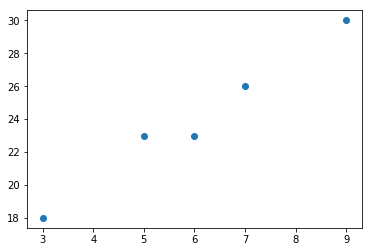

In [18]:

data = [(5, 23), (9, 30), (3, 18), (7,26), (6, 23)]

plt.scatter([ x for x,y in data], [y for x,y in data])
plt.show()

In [19]:
# Confidence Interval calculation
data = [
    235, 374, 309, 499, 253,
    421, 361, 514, 462, 369,
    394, 439, 348, 344, 330,
    261, 374, 302, 466, 535,
    386, 316, 296, 332, 334
]
a = 0.05
sigma = 75
x_bar = mean(data)
print('sample mean:', x_bar)

ratio = sigma / math.sqrt(len(data))
error = round(norm.ppf(1 - (a /2)), 3)
print(error, '*', ratio)
result = ratio * error
LCL = x_bar - result
UCL = x_bar + result

print(LCL, UCL)


sample mean: 370.16
1.96 * 15.0
340.76000000000005 399.56


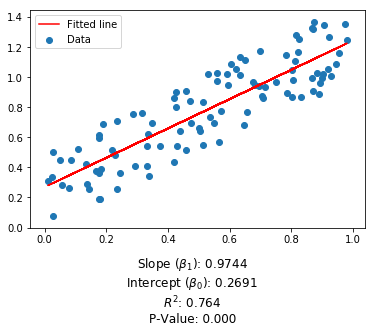

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     317.4
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           1.70e-32
Time:                        08:38:33   Log-Likelihood:                 45.008
No. Observations:                 100   AIC:                            -86.02
Df Residuals:                      98   BIC:                            -80.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2691      0.033      8.246      0.0

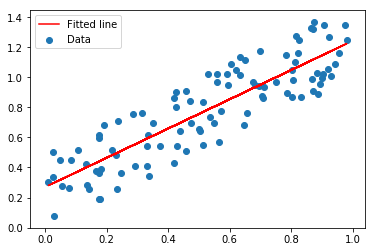

In [20]:
import statsmodels.api as sm
from scipy import stats

x = np.random.rand(100)
y = x + np.random.rand(100)*0.5

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

plt.scatter(x, y, label='Data')
plt.plot(x, intercept + slope * x, 'r', label='Fitted line')
plt.legend()
text = f'Slope ($\\beta_1$): {slope:.4f}\n Intercept ($\\beta_0$): {intercept:.4f}\n $R^2$: {r_value**2:.3f}\n P-Value: {p_value:.3f}'
plt.figtext(0.5, -0.2, text, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

results = sm.OLS(y, sm.add_constant(x)).fit()
print(results.summary())

X_plot = np.linspace(0,1,100)
plt.plot(x, results.params[0] + results.params[1] * x, 'r', label='Fitted line')

plt.scatter(x, y, label='Data')
plt.legend()
plt.show()

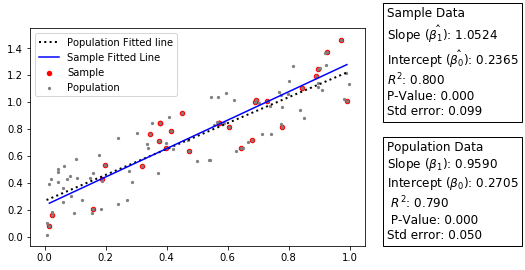

In [21]:
###### import statsmodels.api as sm
from scipy import stats
import random

data_x = np.random.rand(100)
data_y = data_x + np.random.rand(100)*0.5
slope, intercept, r_value, p_value, std_err = stats.linregress(data_x, data_y)

min_x = min(data_x)
max_x = max(data_x)

plt.plot([min_x, max_x], [intercept + slope * x for x in [min_x, max_x]], 'k', linestyle='dotted', linewidth=2, label='Population Fitted line')
text = f'Population Data\nSlope ($\\beta_1$): {slope:.4f}\nIntercept ($\\beta_0$): {intercept:.4f}\n $R^2$: {r_value**2:.3f}\n P-Value: {p_value:.3f}\nStd error: {std_err:.3f}'
plt.figtext(0.95, 0.15, text, wrap=False, horizontalalignment='center', fontsize=12,
           bbox=dict(facecolor='white'), ha='left'
)

sample_size = 30

samples = random.choices(range(len(data_x)), k=sample_size)
x_bar = np.array([data_x[s] for s in samples])
y_bar = np.array([data_y[s] for s in samples])

slope, intercept, r_value, p_value, std_err = stats.linregress(x_bar, y_bar)

min_x = min(x_bar)
max_x = max(x_bar)

plt.scatter(x_bar, y_bar, s=20, color='r', label='Sample')
plt.scatter(data_x, data_y, s=5, color='gray', label='Population')
#plt.plot(x_bar, intercept + slope * x_bar, 'b', label='Sample Fitted Line')
plt.plot([min_x, max_x], [intercept + slope * x for x in [min_x, max_x]], 'b', label='Sample Fitted Line')
plt.legend()
text = (
    f'Sample Data\n'
    f'Slope ($\\hat{{\\beta_1}}$): {slope:.4f}\n'
    f'Intercept ($\\hat{{\\beta_0}}$): {intercept:.4f}\n'
    f'$R^2$: {r_value**2:.3f}\n'
    f'P-Value: {p_value:.3f}\n'
    f'Std error: {std_err:.3f}'
)
        
#plt.figtext(1, .0, text, wrap=True, horizontalalignment='center', fontsize=12)
plt.figtext(
    0.95, 0.58, text, wrap=False, horizontalalignment='center', fontsize=12,
    bbox=dict(facecolor='white'), ha='left'

)

#plt.rcParams["figure.figsize"] = 10,10
plt.show()



24
24
24
   Interest_Rate  Unemployment_Rate
0           2.75                5.3
Intercept: 
 1798.4039776258546
Coefficients: 
 [ 345.54008701 -250.14657137]
Predicted Stock Index Price: 
 [1422.86238865]
                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           4.04e-11
Time:                        10:16:05   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
    

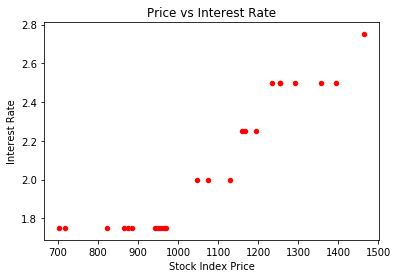

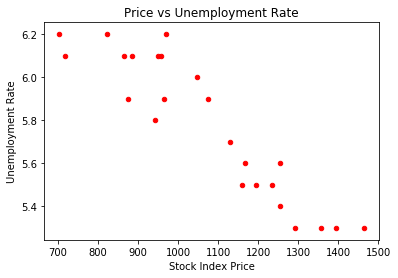

In [77]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

Stock_Market = {
    'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
    'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
    'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
    'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
    'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
}
df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])


X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']
print(X.iloc[[0]])
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
# Do a series of predictions on a list of data
predictions = model.predict(X) 
# Do a prediction on a single pair
predictions = model.predict(X.iloc[[0]]) 
prediction_a = model.predict((0, 2.75, 5.3)) 
    
print_model = model.summary()
print(print_model)
print('DF', predictions)
print('Tuple', prediction_a)


plt.scatter(df['Stock_Index_Price'], df['Interest_Rate'], s=20, color='r', label='Sample')
plt.title(r'Price vs Interest Rate')
plt.xlabel(r'Stock Index Price')
plt.ylabel(r'Interest Rate')
plt.show()

plt.scatter(df['Stock_Index_Price'], df['Unemployment_Rate'], s=20, color='r', label='Sample')
plt.title(r'Price vs Unemployment Rate')
plt.xlabel(r'Stock Index Price')
plt.ylabel(r'Unemployment Rate')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     103.9
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           5.57e-18
Time:                        10:12:22   Log-Likelihood:                -392.41
No. Observations:                  50   AIC:                             790.8
Df Residuals:                      47   BIC:                             796.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -879.9443    254.624     -3.456      0.0

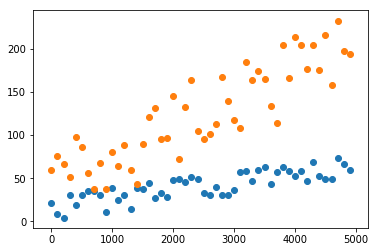

   const   X1   X2
0    1.0   50   25
1    1.0  300   75
2    1.0  325  100


0     1086.274638
1     9689.859853
2    10877.554299
dtype: float64

In [76]:
x1 = [x + random.randrange(1,30) for x in range(50)]
x2 = [x + random.randrange(1,100) for x in range(0, 150, 3)]
y = list(range(0, 5000, 100))

data  = {
    'X1': x1,
    'X2': x2,
    'Y': y
}

df = DataFrame(data, columns=['X1', 'X2', 'Y'])

X = df[['X1', 'X2']]
Y = df['Y']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
print(model.summary())

plt.scatter(y, x1)
plt.scatter(y, x2)
plt.show()

data  = {
    'X1': [50, 300, 325],
    'X2': [25, 75, 100]
}
df2 = DataFrame(data, columns=['X1', 'X2'])
df2 = sm.add_constant(df2)
print(df2)
model.predict(df2)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     44.57
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           8.65e-11
Time:                        11:46:28   Log-Likelihood:                -74.321
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      28   BIC:                             162.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.1055      2.111     17.579      0.0

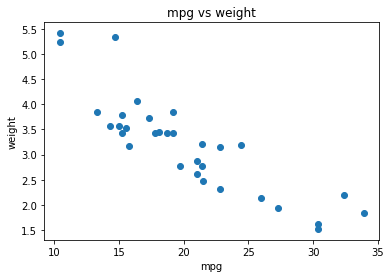

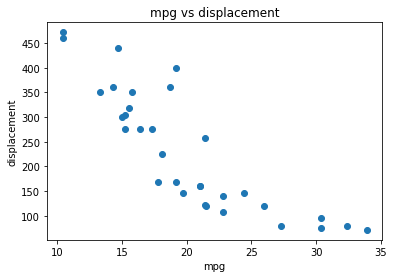

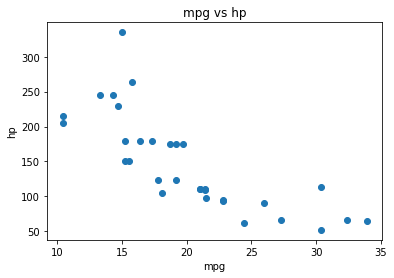

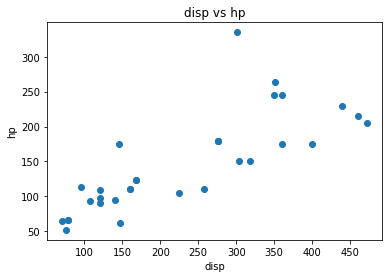

In [124]:
data = {
'Car' : [ 'Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive', 'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230', 'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC', 'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial', 'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona', 'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird', 'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L', 'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
'mpg' : [ 21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4],
'disp' : [ 160.0, 160.0, 108.0, 258.0, 360.0, 225.0, 360.0, 146.7, 140.8, 167.6, 167.6, 275.8, 275.8, 275.8, 472.0, 460.0, 440.0, 78.7, 75.7, 71.1, 120.1, 318.0, 304.0, 350.0, 400.0, 79.0, 120.3, 95.1, 351.0, 145.0, 301.0, 121.0],
'hp' : [ 110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, 65, 97, 150, 150, 245, 175, 66, 91, 113, 264, 175, 335, 109],
'wt' : [ 2.620, 2.875, 2.320, 3.215, 3.440, 3.460, 3.570, 3.190, 3.150, 3.440, 3.440, 4.070, 3.730, 3.780, 5.250, 5.424, 5.345, 2.200, 1.615, 1.835, 2.465, 3.520, 3.435, 3.840, 3.845, 1.935, 2.140, 1.513, 3.170, 2.770, 3.570, 2.780]
}
df = DataFrame(data, columns=['Car', 'mpg', 'disp', 'hp', 'wt'])
X = df[['disp', 'hp', 'wt']]
Y = df['mpg']

X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
print(model.summary())

prediction = model.predict([1, 221, 102, 2.91])
print('sm predict:', prediction)

def predictor(coefs, disp, hp, wt):
    print(f'{coefs.const} + (({coefs.disp}) * {disp}) + (({coefs.hp}) * {hp}) + (({coefs.wt}) * {wt})')
    Y = coefs.const + ((coefs.disp) * disp) + ((coefs.hp) * hp) + ((coefs.wt) * wt)
    print(Y)
    
predictor(model.params, 221, 102, 2.91)

plt.scatter(data['mpg'], data['wt'])
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('mpg vs weight')
plt.show()
plt.scatter(data['mpg'], data['disp'])
plt.xlabel('mpg')
plt.ylabel('displacement')
plt.title('mpg vs displacement')
plt.show()
plt.scatter(data['mpg'], data['hp'])
plt.xlabel('mpg')
plt.ylabel('hp')
plt.title('mpg vs hp')
plt.show()